# Import Libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load Data

In [32]:
file_path = '/content/drive/MyDrive/Finlatics/DsResearch/Media_and_Technology/Global_YouTube_Statistics.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1')
 # Display the first few rows of the dataset
print(data.head())

   rank                    Youtuber  subscribers   video views  \
0     1                    T-Series  245000000.0  2.280000e+11   
1     2              YouTube Movies  170000000.0  0.000000e+00   
2     3                     MrBeast  166000000.0  2.836884e+10   
3     4  Cocomelon - Nursery Rhymes  162000000.0  1.640000e+11   
4     5                   SET India  159000000.0  1.480000e+11   

           category                       Title  uploads Country of origin  \
0             Music                    T-Series    20082             India   
1  Film & Animation               youtubemovies        1     United States   
2     Entertainment                     MrBeast      741     United States   
3         Education  Cocomelon - Nursery Rhymes      966     United States   
4             Shows                   SET India   116536             India   

         Country Abbreviation  ... subscribers_for_last_30_days  created_year  \
0          india           IN  ...                   

# Handling Missing values

In [34]:
# Handled missing values
data = data.dropna()

# Filled the numerical columns with the mean
numerical_columns = ['subscribers', 'video views', 'uploads', 'lowest_monthly_earnings', 'highest_monthly_earnings',
                     'lowest_yearly_earnings', 'highest_yearly_earnings', 'Gross tertiary education enrollment (%)',
                   'Population', 'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude']
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())

# Filled categorical columns with the mode
categorical_columns = ['category', 'channel_type', 'Country', 'Abbreviation']
for col in categorical_columns:
   data[col] = data[col].fillna(data[col].mode()[0])

# Convert 'created_date' to datetime format
data['created_date'] = pd.to_datetime(data['created_date'])

# Compute months since creation
data['months_since_creation'] = (pd.to_datetime('today') - data['created_date']).dt.days // 30

# Compute average subscribers gained per month
data['avg_subs_per_month'] = data['subscribers'] / data['months_since_creation']

# Scale numerical features
scaler = StandardScaler()
data.loc[:, numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Print the cleaned and preprocessed data
print(data.head())


   rank                    Youtuber  subscribers  video views        category  \
0     1                    T-Series    11.210967    12.254502           Music   
2     3                     MrBeast     7.189251     0.860448   Entertainment   
3     4  Cocomelon - Nursery Rhymes     6.985620     8.601668       Education   
4     5                   SET India     6.832897     7.688460           Shows   
8     9                 Like Nastya     4.134784     4.405422  People & Blogs   

                        Title   uploads Country of origin        Country  \
0                    T-Series  0.115799             India          india   
2                     MrBeast -0.320019     United States  United States   
3  Cocomelon - Nursery Rhymes -0.314949     United States  United States   
4                   SET India  2.289238             India          India   
8            Like Nastya Vlog -0.325608            Russia         Russia   

  Abbreviation  ... created_month                  creat

# 1. What are the top 10 YouTube channels based on the number of  subscribers?



Top 10 YouTube channels based on the number of subscribers:
   rank                    Youtuber  subscribers
0     1                    T-Series    11.210967
1     2                     MrBeast     7.189251
2     3  Cocomelon - Nursery Rhymes     6.985620
3     4                   SET India     6.832897
4     5                 Like Nastya     4.134784
5     6               Vlad and Niki     3.773339
6     7           Zee Music Company     3.661342
7     8                         WWE     3.625706
8     9                         WWE     3.625706
9    10                    Sony SAB     2.963905


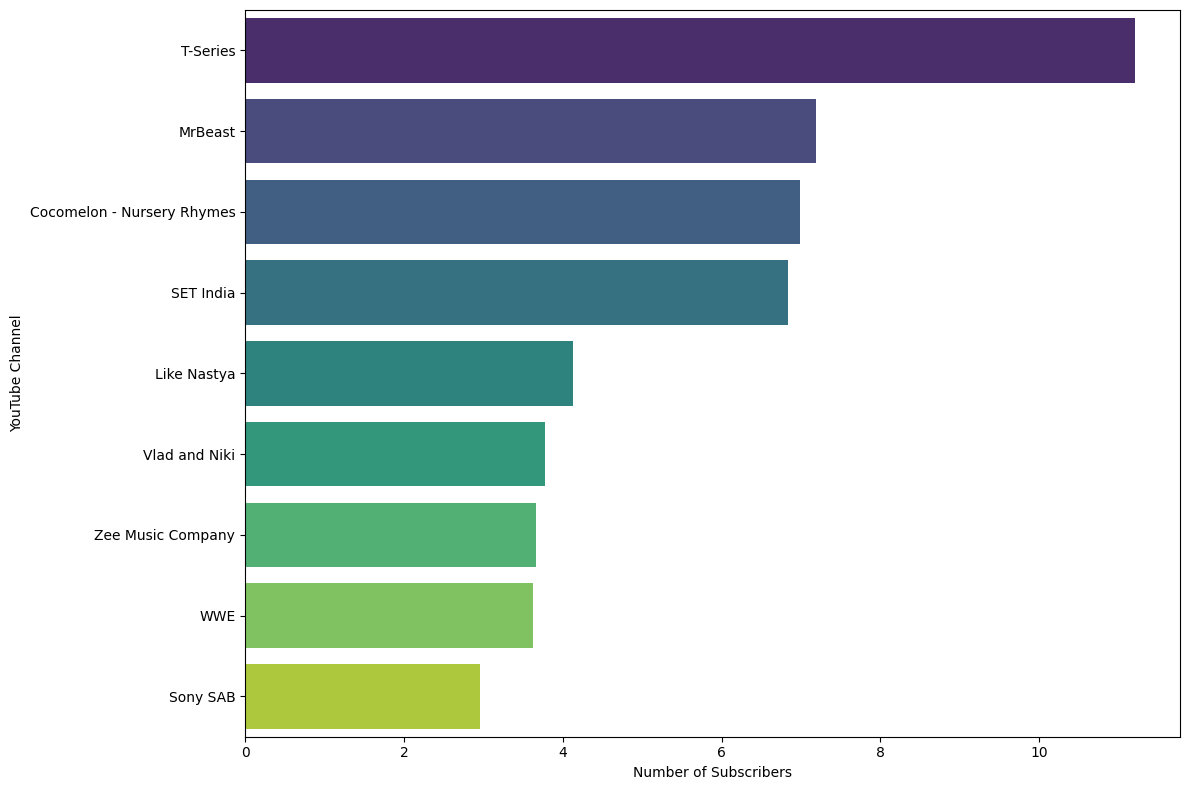

In [35]:
top_10_channels = data.nlargest(10, 'subscribers')[['Youtuber', 'subscribers']].reset_index(drop=True)
top_10_channels['rank'] = top_10_channels.index + 1
print("Top 10 YouTube channels based on the number of subscribers:")
print(top_10_channels[['rank', 'Youtuber', 'subscribers']])

#bar chart
plt.figure(figsize=(12, 8))
import seaborn as sns

sns.barplot(x='subscribers', y='Youtuber', data=top_10_channels, palette='viridis', hue='Youtuber', legend=False)
plt.xlabel('Number of Subscribers')
plt.ylabel('YouTube Channel')
plt.tight_layout()
plt.show()


#2. Category with the Highest Average Number of Subscribers



Average Subscribers by Category:
                 category  subscribers
14                  Shows     0.953472
16               Trailers     0.723962
15                 Sports     0.568184
2               Education     0.297385
8                   Music     0.243136
10  Nonprofits & Activism     0.151250
7                  Movies     0.044343
4        Film & Animation     0.028288
3           Entertainment    -0.073118
11         People & Blogs    -0.163554
9         News & Politics    -0.169978
1                  Comedy    -0.225157
5                  Gaming    -0.244983
12         Pets & Animals    -0.273830
13   Science & Technology    -0.302987
6           Howto & Style    -0.411281
0        Autos & Vehicles    -0.416372


<ipython-input-38-469f24578489>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='subscribers', y='category', data=avg_subscribers_by_category, palette='viridis')


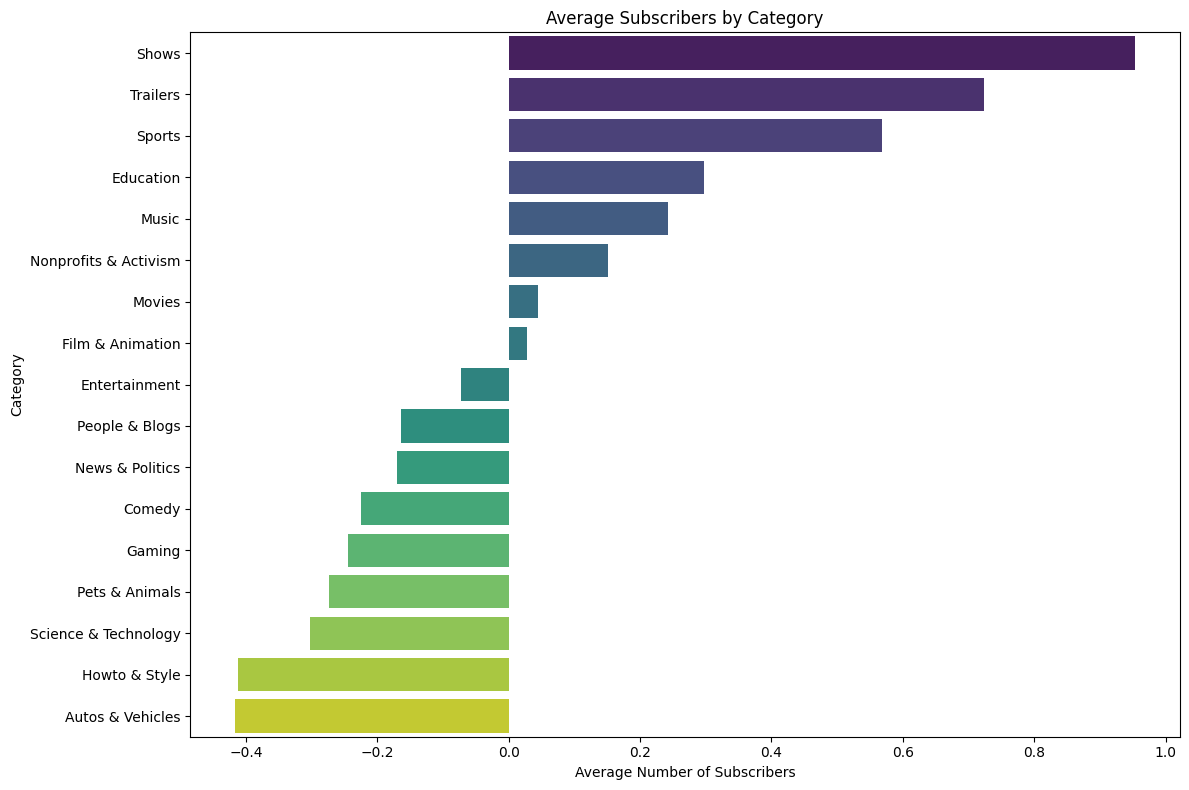

In [38]:
# Calculate average subscribers by category
avg_subscribers_by_category = data.groupby('category')['subscribers'].mean().reset_index()

# Sort categories by average subscribers (optional)
avg_subscribers_by_category = avg_subscribers_by_category.sort_values(by='subscribers', ascending=False)
# Print the average subscribers by category
print("Average Subscribers by Category:")
print(avg_subscribers_by_category)
# Create the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='subscribers', y='category', data=avg_subscribers_by_category, palette='viridis')

plt.title('Average Subscribers by Category')
plt.xlabel('Average Number of Subscribers')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

# 3.How many videos, on average, are uploaded by YouTube channels in each category?

Average Number of Videos Uploaded by Category:
                 category   uploads
9         News & Politics  2.941115
10  Nonprofits & Activism  1.982243
14                  Shows  0.333217
3           Entertainment  0.080967
15                 Sports  0.070812
11         People & Blogs  0.028271
16               Trailers -0.182611
12         Pets & Animals -0.203033
4        Film & Animation -0.255771
7                  Movies -0.256655
8                   Music -0.270973
5                  Gaming -0.276801
13   Science & Technology -0.282171
2               Education -0.282719
6           Howto & Style -0.295300
0        Autos & Vehicles -0.301775
1                  Comedy -0.302720


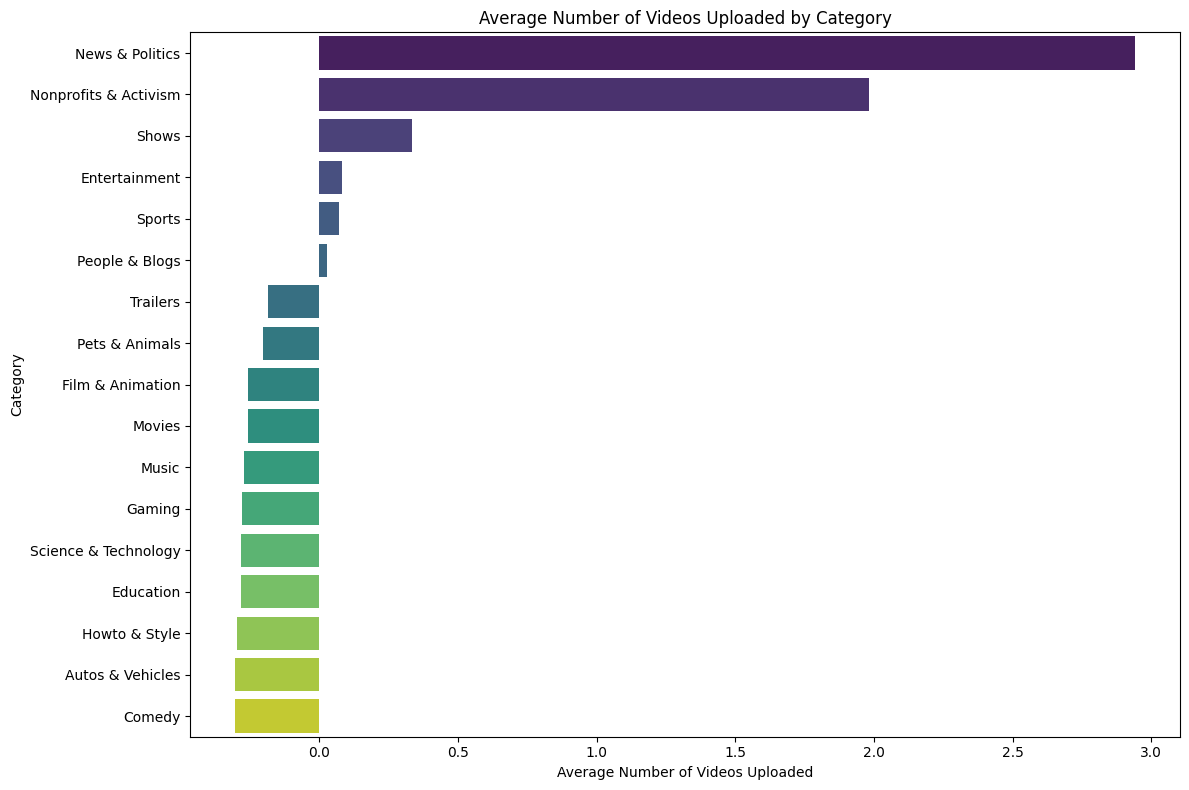

In [40]:
# Calculate average number of videos uploaded by category
avg_videos_by_category = data.groupby('category')['uploads'].mean().reset_index()

# Sort categories by average number of uploads (optional)
avg_videos_by_category = avg_videos_by_category.sort_values(by='uploads', ascending=False)

# Print the average number of videos uploaded by category
print("Average Number of Videos Uploaded by Category:")
print(avg_videos_by_category)

# Create the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='uploads', y='category', data=avg_videos_by_category, palette='viridis', hue='category', dodge=False)

# Remove the legend
plt.legend([], [], frameon=False)

plt.title('Average Number of Videos Uploaded by Category')
plt.xlabel('Average Number of Videos Uploaded')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

# 4.What are the top 5 countries with the highest number of YouTube channels?

Top 5 Countries by Number of YouTube Channels:
          Country  Number of YouTube Channels
0   United States                         180
1           India                         136
2          Brazil                          32
3  United Kingdom                          27
4       Indonesia                          19


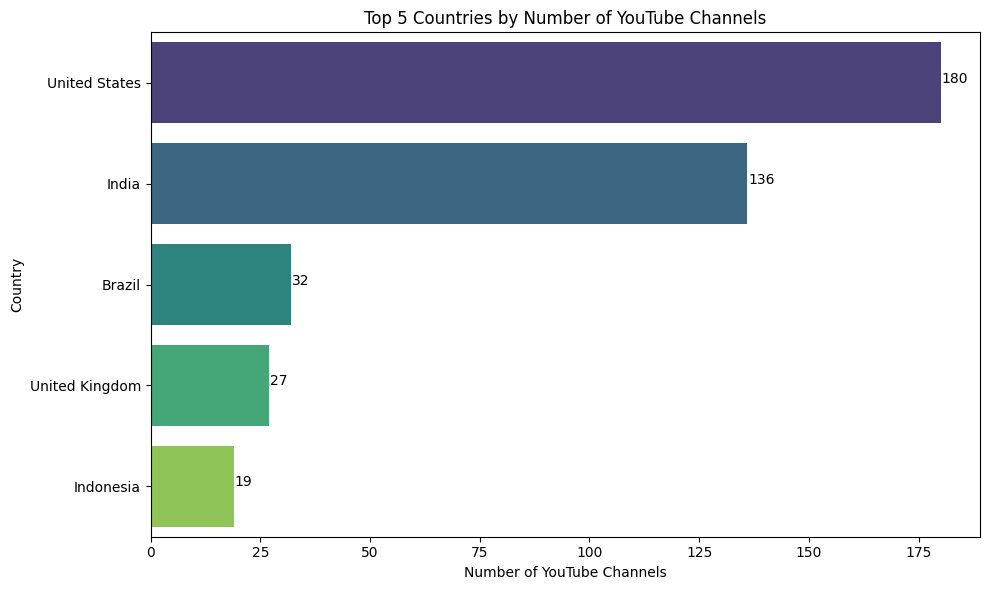

In [42]:
# Count the number of YouTube channels per country
top_countries = data['Country'].value_counts().head(5).reset_index()
top_countries.columns = ['Country', 'Number of YouTube Channels']

# Print the top 5 countries by the number of YouTube channels
print("Top 5 Countries by Number of YouTube Channels:")
print(top_countries)

# Create the bar chart with exact numbers displayed on bars
plt.figure(figsize=(10, 6))
plot = sns.barplot(x='Number of YouTube Channels', y='Country', data=top_countries, palette='viridis', hue='Country', dodge=False)

# Remove the legend
plt.legend([], [], frameon=False)

plt.title('Top 5 Countries by Number of YouTube Channels')
plt.xlabel('Number of YouTube Channels')
plt.ylabel('Country')

# Display exact numbers on bars
for index, row in top_countries.iterrows():
    plot.text(row['Number of YouTube Channels'] + 0.2, index, row['Number of YouTube Channels'], color='black', ha="left")

plt.tight_layout()
plt.show()


# 5.What is the distribution of channel types across different categories?

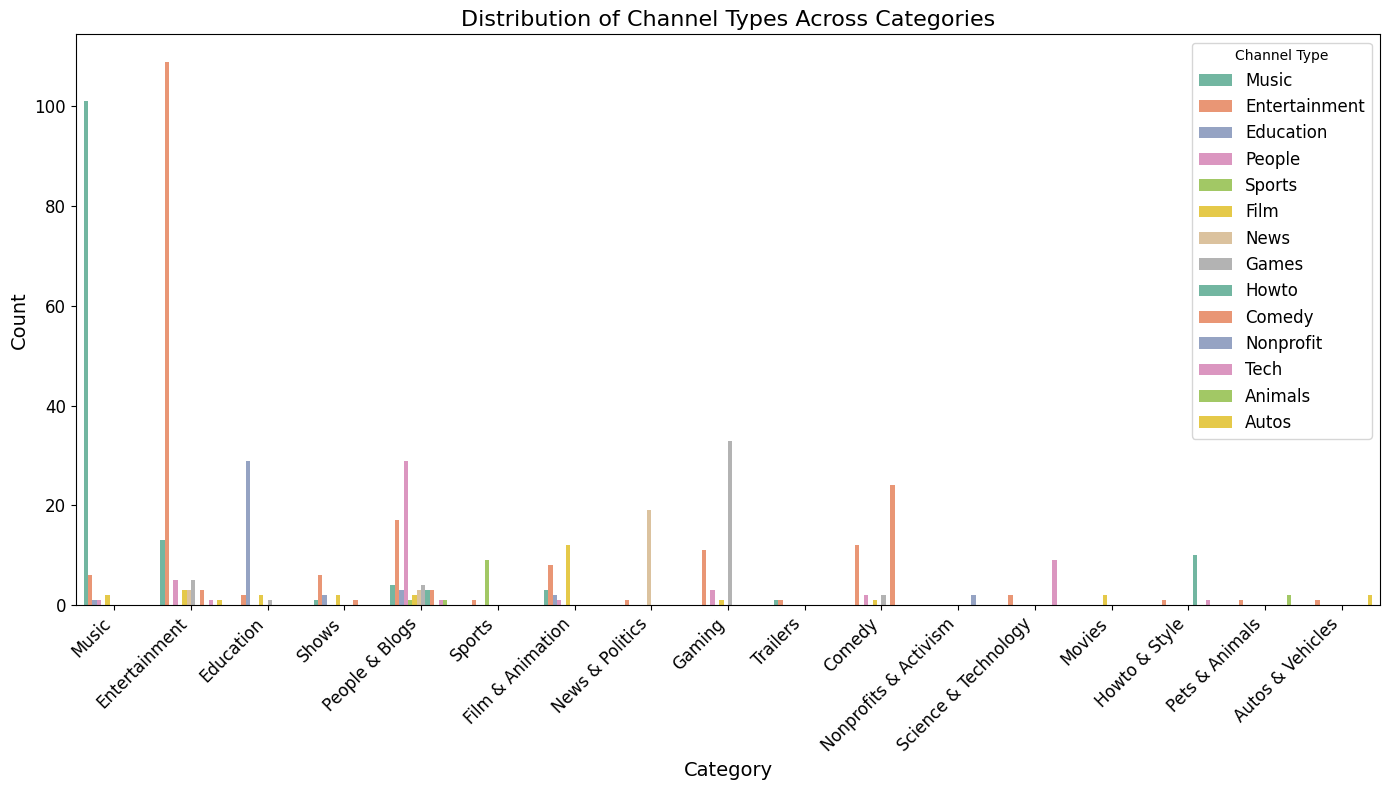

Distribution of Channel Types Across Categories:
            category   channel_type  Count
0   Autos & Vehicles          Autos      2
1   Autos & Vehicles  Entertainment      1
2             Comedy         Comedy     24
3             Comedy  Entertainment     12
4             Comedy           Film      1
..               ...            ...    ...
61             Shows          Music      1
62            Sports  Entertainment      1
63            Sports         Sports      9
64          Trailers  Entertainment      1
65          Trailers          Music      1

[66 rows x 3 columns]
The number of each channel type:
channel_type
Entertainment    179
Music            123
Games             45
People            41
Education         37
Comedy            31
Film              27
News              25
Howto             13
Tech              12
Sports            10
Animals            3
Autos              3
Nonprofit          2
Name: count, dtype: int64
Percentage for each channel type:
channel_type

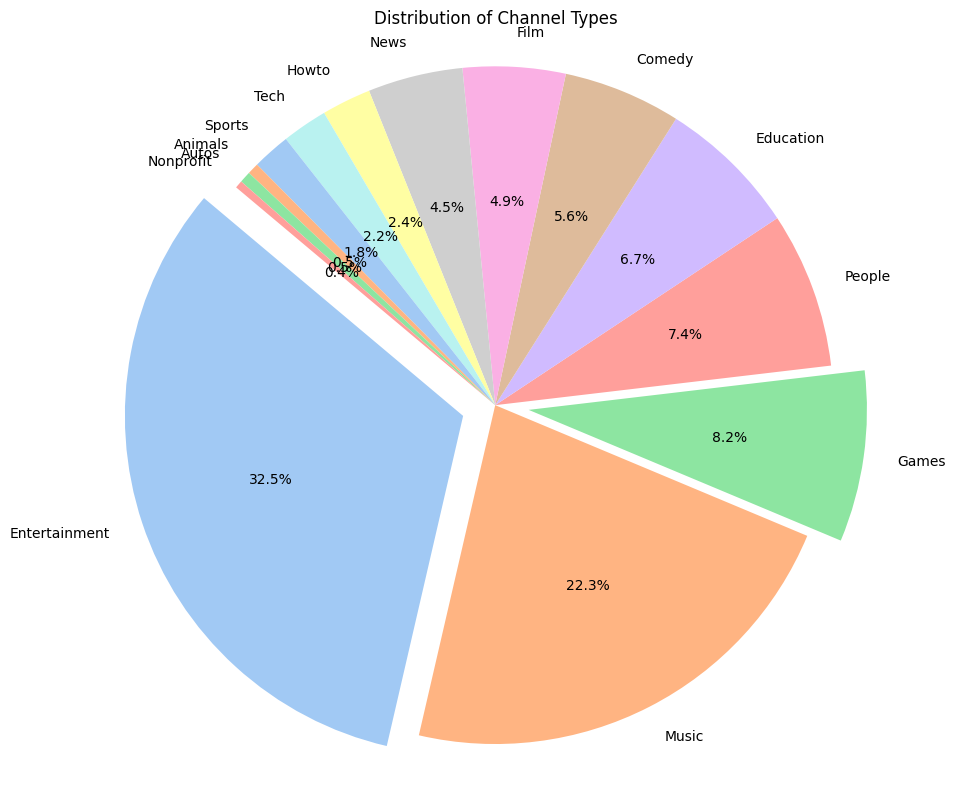


Insights on Content Variety within Categories:
category          channel_type 
Autos & Vehicles  Autos             2
                  Entertainment     1
Comedy            Comedy           24
                  Entertainment    12
                  Games             2
                                   ..
Shows             Comedy            1
Sports            Sports            9
                  Entertainment     1
Trailers          Entertainment     1
                  Music             1
Name: count, Length: 66, dtype: int64


In [43]:
# Count plot for distribution of channel types across categories
plt.figure(figsize=(14, 8))
plot = sns.countplot(x='category', hue='channel_type', data=data, palette='Set2', dodge=True)

plt.title('Distribution of Channel Types Across Categories', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Channel Type', fontsize=12)
plt.tight_layout()
plt.show()

# Print Distribution of Channel Types Across Categories
distribution = data.groupby(['category', 'channel_type']).size().reset_index(name='Count')
print("Distribution of Channel Types Across Categories:")
print(distribution)

# Calculate the number of each channel type
channel_type_counts = data['channel_type'].value_counts()
print('The number of each channel type:')
print(channel_type_counts)

# Calculate percentage for each channel type
channel_type_percentages = channel_type_counts / channel_type_counts.sum() * 100
print('Percentage for each channel type:')
print(channel_type_percentages)

# Plotting the Pie Chart for Distribution of Channel Types
plt.figure(figsize=(10, 8))
colors = sns.color_palette('pastel')[0:len(channel_type_counts)]
explode = [0.1 if idx in [0, 2] else 0 for idx in range(len(channel_type_counts))]
plt.pie(channel_type_percentages, labels=channel_type_percentages.index, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Distribution of Channel Types')
plt.axis('equal')
plt.tight_layout()
plt.show()

# Insights on Content Variety within Categories
print("\nInsights on Content Variety within Categories:")
content_variety = data.groupby('category')['channel_type'].value_counts()
print(content_variety)

# 6. Is there a correlation between the number of subscribers and total video views for YouTube channels?

In [44]:
correlation_subscribers_views = data['subscribers'].corr(data['video views'])
print(correlation_subscribers_views)

0.857642305668973


#7. How do the monthly earnings vary throughout different categories?

                       lowest_monthly_earnings  highest_monthly_earnings
category                                                                
Autos & Vehicles                      0.283327                  0.277041
Comedy                                0.161784                  0.160113
Education                             0.090458                  0.093230
Entertainment                         0.067523                  0.066952
Film & Animation                      0.041330                  0.041753
Gaming                               -0.323399                 -0.322233
Howto & Style                        -0.466889                 -0.466795
Movies                               -0.324886                 -0.324461
Music                                -0.019890                 -0.021353
News & Politics                      -0.036692                 -0.036750
Nonprofits & Activism                -0.377131                 -0.376996
People & Blogs                       -0.081984     

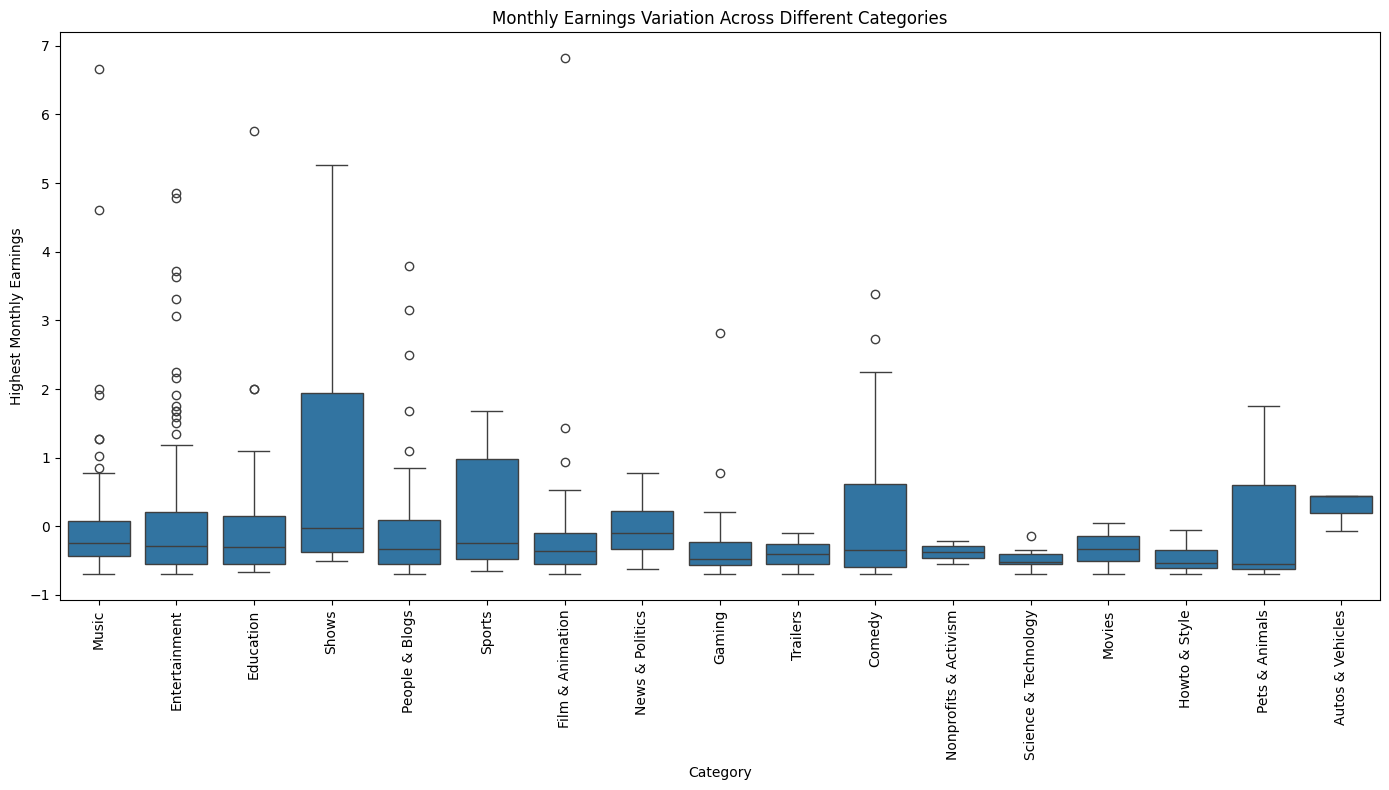

In [45]:
earnings_by_category = data.groupby('category').agg({'lowest_monthly_earnings': 'mean', 'highest_monthly_earnings': 'mean'})
print(earnings_by_category)
plt.figure(figsize=(14, 8))
sns.boxplot(data=data, x='category', y='highest_monthly_earnings')
plt.xticks(rotation=90)
plt.title('Monthly Earnings Variation Across Different Categories')
plt.xlabel('Category')
plt.ylabel('Highest Monthly Earnings')
plt.tight_layout()
plt.show()

#8. What is the overall trend in subscribers gained in the last 30 days across all channels?

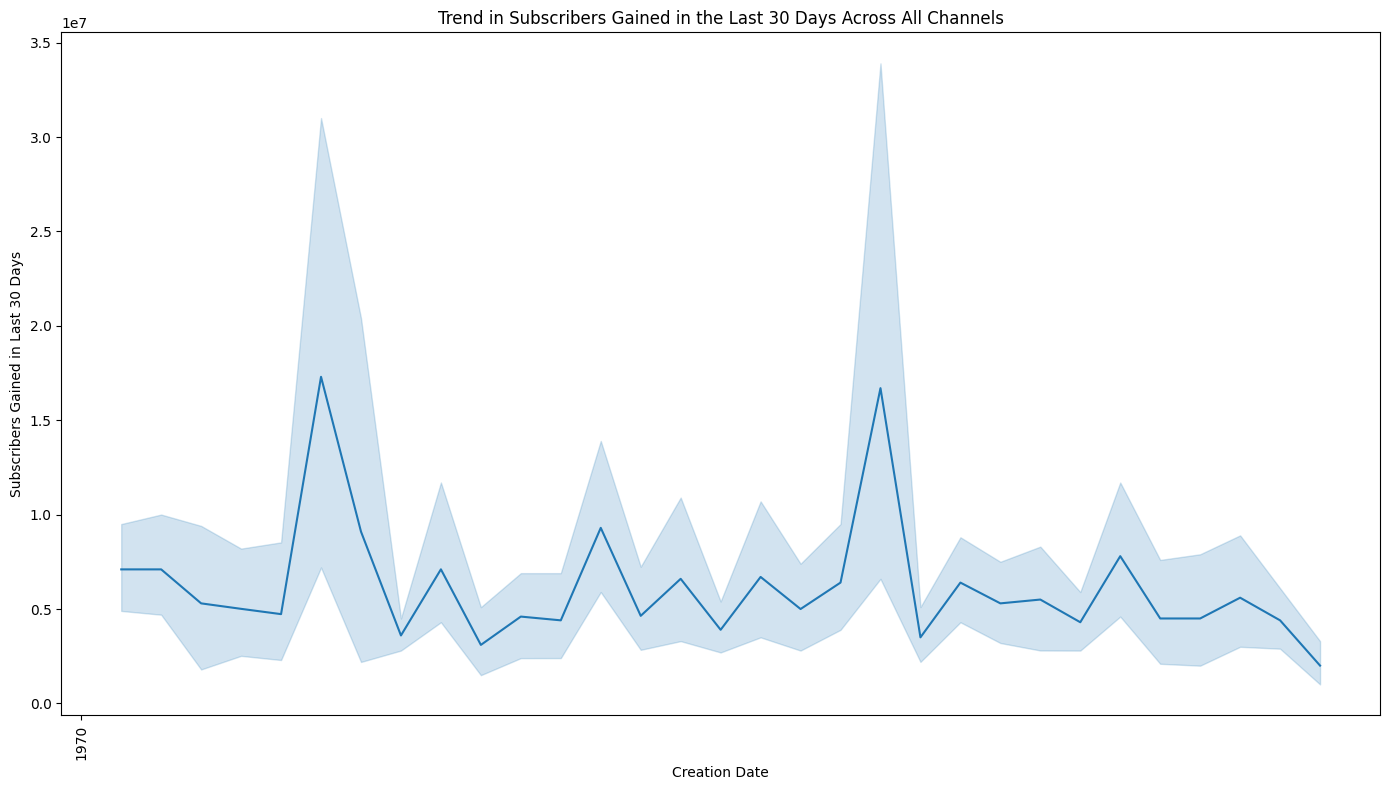

Total subscribers gained in the last 30 days: 191491555.0


In [46]:

plt.figure(figsize=(14, 8))
sns.lineplot(data=data, x='created_date', y='subscribers_for_last_30_days', estimator='sum')
plt.xticks(rotation=90)
plt.title('Trend in Subscribers Gained in the Last 30 Days Across All Channels')
plt.xlabel('Creation Date')
plt.ylabel('Subscribers Gained in Last 30 Days')
plt.tight_layout()
plt.show()
subscribers_last_30_days_trend = data['subscribers_for_last_30_days'].sum()
print(f"Total subscribers gained in the last 30 days: {subscribers_last_30_days_trend}")

#9. Are there any outliers in terms of yearly earnings from YouTube channels?

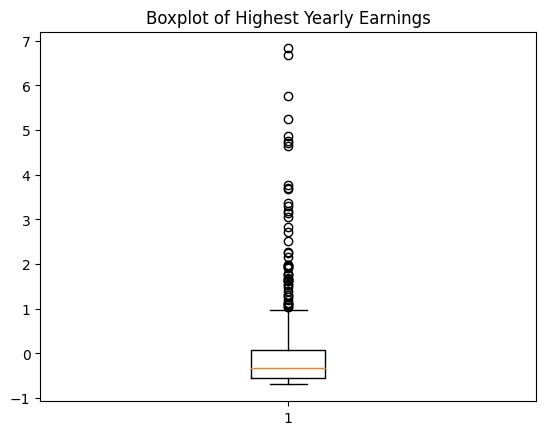

     rank                    Youtuber  subscribers  video views  \
0       1                    T-Series    11.210967    12.254502   
2       3                     MrBeast     7.189251     0.860448   
3       4  Cocomelon - Nursery Rhymes     6.985620     8.601668   
4       5                   SET India     6.832897     7.688460   
15     16                    Sony SAB     2.963905     5.005910   
21     22                      Zee TV     2.327558     3.415732   
26     27                   Colors TV     2.027202     2.752049   
56     57                 HAR PAL GEO     1.009046     1.589315   
65     66              ARY Digital HD     0.937775     1.406715   
83     84                 GR6 EXPLODE     0.718872     0.676973   
139   140                    StarPlus     0.367608     0.770945   
212   213                   PANDA BOI     0.082524     0.223643   
310   311              LeoNata Family    -0.110925     0.787164   
388   389                   dednahype    -0.233104     0.43526

In [47]:
# Using boxplot or Z-score for outlier detection
# For boxplot:
plt.boxplot(data['highest_yearly_earnings'])
plt.title('Boxplot of Highest Yearly Earnings')
plt.show()

# For Z-score:
from scipy import stats
z_scores = stats.zscore(data['highest_yearly_earnings'])
outliers = data[(z_scores > 3) | (z_scores < -3)]
print(outliers)


#10. What is the distribution of channel creation dates? Is there any trend over time?

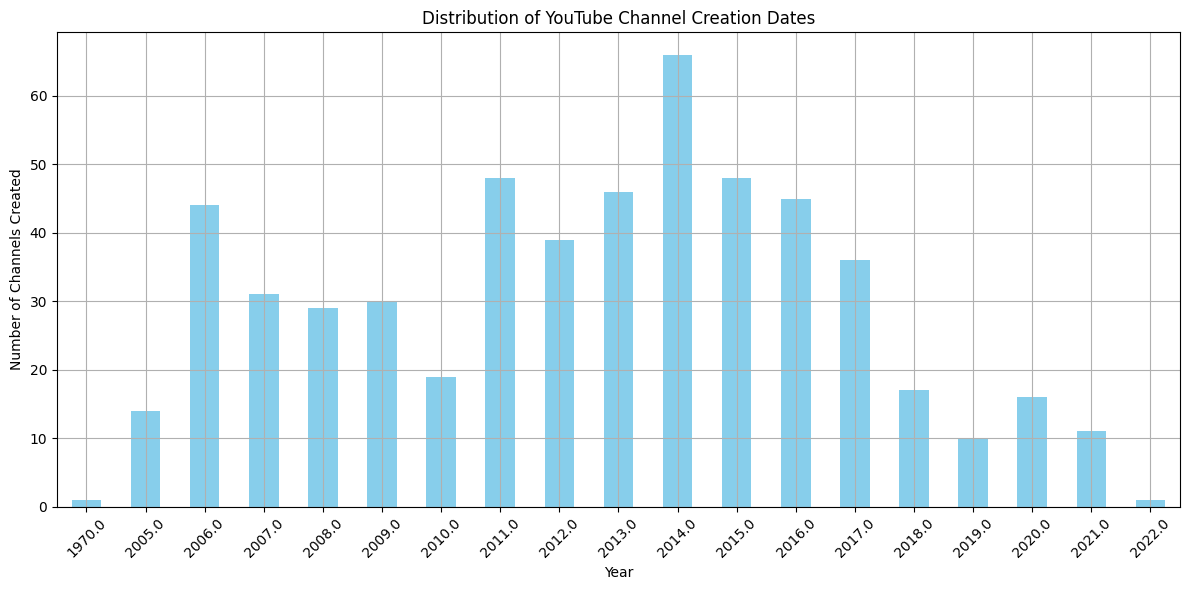

In [48]:
plt.figure(figsize=(12, 6))
data['created_year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of YouTube Channel Creation Dates')
plt.xlabel('Year')
plt.ylabel('Number of Channels Created')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


#11. Is there a relationship between gross tertiary education enrollment and the number of YouTube channels in a country?

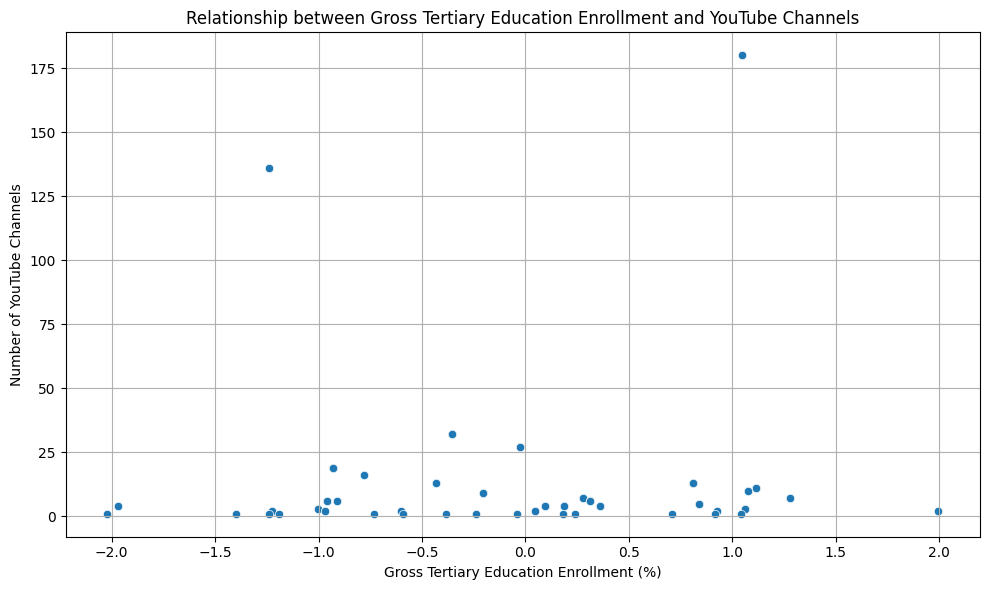

Correlation Coefficient: 0.25250785511886287
Correlation between gross tertiary education enrollment and the number of YouTube channels in a country: 0.04730724416179328


In [49]:
channel_counts = data['Country'].value_counts().reset_index()
channel_counts.columns = ['Country', 'Channel_Count']

# Merge with 'Gross tertiary education enrollment (%)' data
merged_data = pd.merge(channel_counts, data[['Country', 'Gross tertiary education enrollment (%)']], on='Country')

# Calculate correlation coefficient
correlation = merged_data['Channel_Count'].corr(merged_data['Gross tertiary education enrollment (%)'])

# Plot the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='Gross tertiary education enrollment (%)', y='Channel_Count')
plt.title('Relationship between Gross Tertiary Education Enrollment and YouTube Channels')
plt.xlabel('Gross Tertiary Education Enrollment (%)')
plt.ylabel('Number of YouTube Channels')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print correlation coefficient
print(f"Correlation Coefficient: {correlation}")

# Print correlation
country_education_data = data.groupby('Country')['Gross tertiary education enrollment (%)'].mean()
country_channel_counts = data['Country'].value_counts()
education_channels_corr = country_education_data.corr(country_channel_counts)
print(f"Correlation between gross tertiary education enrollment and the number of YouTube channels in a country: {education_channels_corr}")

#12. How does the unemployment rate vary among the top 10 countries with the highest number of YouTube channels?


In [50]:
top_10_countries = data['Country'].value_counts().head(10).index
top_10_unemployment = data[data['Country'].isin(top_10_countries)].groupby('Country')['Unemployment rate'].mean()
print("Unemployment rate variation among the top 10 countries with the highest number of YouTube channels:")
print(top_10_unemployment)

Unemployment rate variation among the top 10 countries with the highest number of YouTube channels:
Country
Argentina         0.193429
Brazil            0.668731
India            -0.726040
Indonesia        -0.865102
Mexico           -1.128697
Russia           -0.885857
Spain             1.058934
Thailand         -1.682869
United Kingdom   -1.039448
United States     1.212525
Name: Unemployment rate, dtype: float64


#13. What is the average urban population percentage in countries with YouTube channels?

In [52]:
# Display summary statistics for 'Urban_population' and 'Population'
summary_stats = data[['Urban_population', 'Population']].describe()
print("Summary statistics for Urban_population and Population:")
print(summary_stats)

# Identify potential outliers
# Define thresholds for outlier detection
lower_threshold = data['Population'] * 0.8
upper_threshold = data['Population'] * 1.2

# Identify rows where Urban_population is outside the defined thresholds
potential_outliers = data[(data['Urban_population'] < lower_threshold) | (data['Urban_population'] > upper_threshold)]
print("\nPotential outliers in Urban_population:")
print(potential_outliers)

# Remove the identified outliers
filtered_data = data[~((data['Urban_population'] < lower_threshold) | (data['Urban_population'] > upper_threshold))].copy()

# Calculate the urban population percentage for each country
filtered_data['Urban_population_percentage'] = (filtered_data['Urban_population'] / filtered_data['Population']) * 100

# Compute the average urban population percentage across all countries
avg_urban_population_percentage = filtered_data['Urban_population_percentage'].mean()

print(f"\nAverage urban population percentage in countries with YouTube channels: {avg_urban_population_percentage:.2f}%")


Summary statistics for Urban_population and Population:
       Urban_population    Population
count      5.510000e+02  5.510000e+02
mean      -3.223878e-17 -1.611939e-17
std        1.000909e+00  1.000909e+00
min       -1.462812e+00 -9.573741e-01
25%       -1.121764e+00 -7.631940e-01
50%        1.891027e-01 -3.215713e-01
75%        8.006291e-01  6.845295e-01
max        3.682254e+00  1.751291e+00

Potential outliers in Urban_population:
      rank                    Youtuber  subscribers  video views  \
2        3                     MrBeast     7.189251     0.860448   
3        4  Cocomelon - Nursery Rhymes     6.985620     8.601668   
8        9                 Like Nastya     4.134784     4.405422   
9       10               Vlad and Niki     3.773339     3.646381   
11      12                         WWE     3.625706     3.660553   
...    ...                         ...          ...          ...   
995     12                         WWE     3.625706     3.660553   
998     40       

#14. Are there any patterns in the distribution of YouTube channels based on latitude and longitude coordinates?

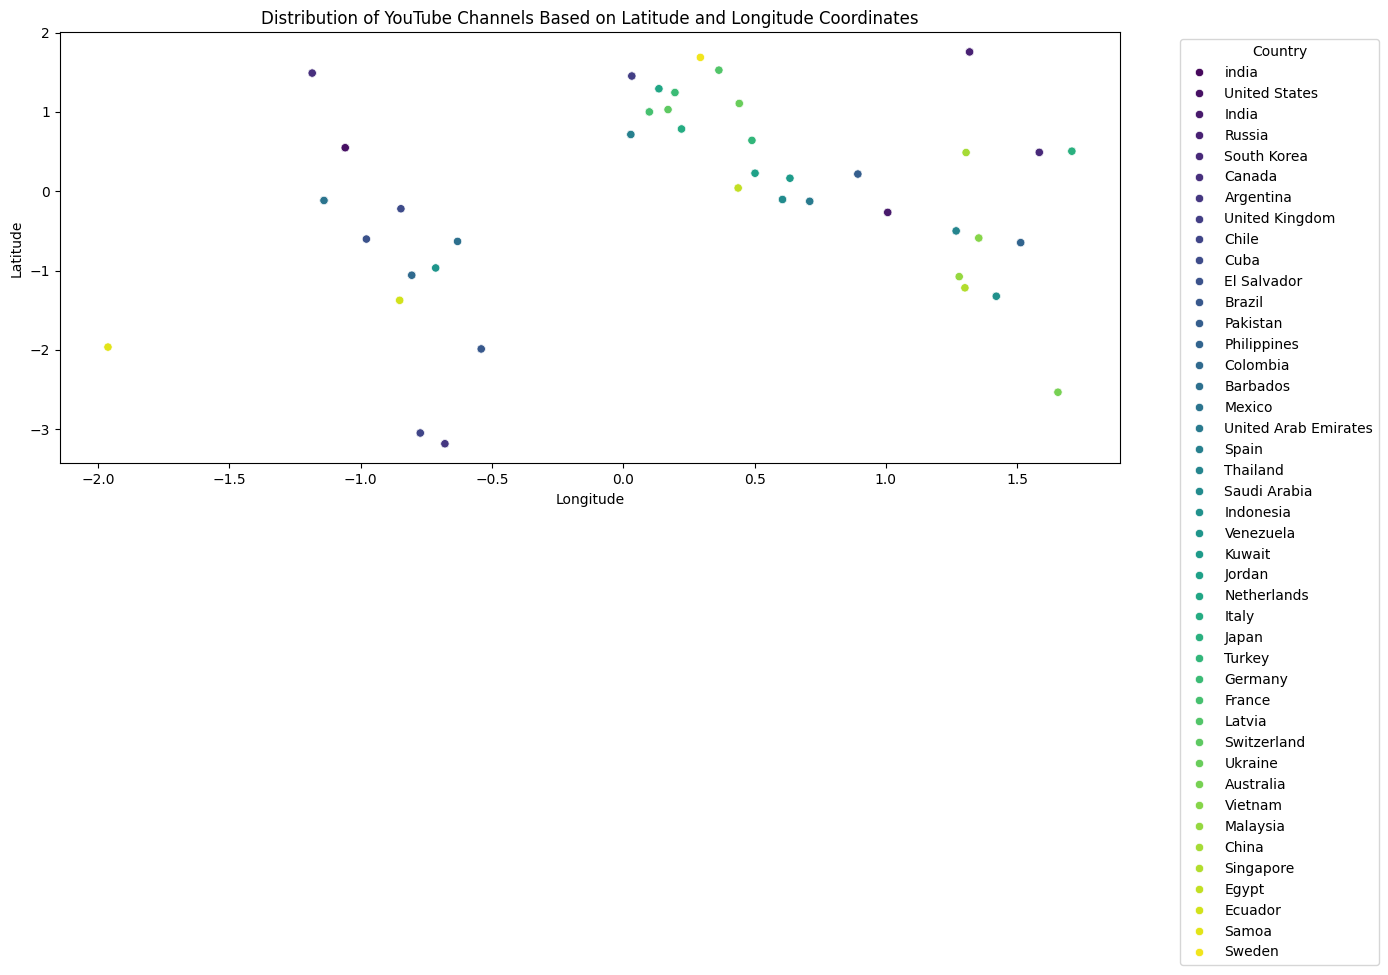

In [53]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=data, x='Longitude', y='Latitude', hue='Country', palette='viridis')
plt.title('Distribution of YouTube Channels Based on Latitude and Longitude Coordinates')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#15. What is the correlation between the number of subscribers and the population of a country?


In [54]:
country_subscribers = data.groupby('Country')['subscribers'].sum()
country_population = data.groupby('Country')['Population'].mean()
subs_population_corr = country_subscribers.corr(country_population)
print(f"Correlation between the number of subscribers and the population of a country: {subs_population_corr}")

Correlation between the number of subscribers and the population of a country: 0.5745508315007977


#16. How do the top 10 countries with the highest number of YouTube channels compare in terms of their total population?


In [55]:
top_10_countries_population = data.groupby('Country')['Population'].sum().nlargest(10)
print(top_10_countries_population)

Country
India          229.925724
China            1.751291
india            1.690630
Turkey          -0.796063
Malaysia        -0.894877
Venezuela       -0.902497
Cuba            -0.935800
Sweden          -0.937831
Switzerland     -0.941147
El Salvador     -0.945258
Name: Population, dtype: float64


#17. Is there a correlation between the number of subscribers gained in the last 30 days and the unemployment rate in a country?

In [56]:
country_subs_30days = data.groupby('Country')['subscribers_for_last_30_days'].sum()
country_unemployment = data.groupby('Country')['Unemployment rate'].mean()
subs_30days_unemployment_corr = country_subs_30days.corr(country_unemployment)
print(f"Correlation between the number of subscribers gained in the last 30 days and the unemployment rate in a country: {subs_30days_unemployment_corr}")

Correlation between the number of subscribers gained in the last 30 days and the unemployment rate in a country: 0.24287293652899386


#18. How does the distribution of video views for the last 30 days vary across different channel types?


channel_type
Animals          7.073477e+08
Entertainment    3.020827e+08
Comedy           2.858220e+08
Music            2.569663e+08
Education        2.382550e+08
Autos            2.355068e+08
Sports           2.281334e+08
News             2.087196e+08
People           1.756107e+08
Film             1.430246e+08
Games            1.369925e+08
Nonprofit        9.759050e+07
Howto            8.584969e+07
Tech             7.240475e+07
Name: video_views_for_the_last_30_days, dtype: float64


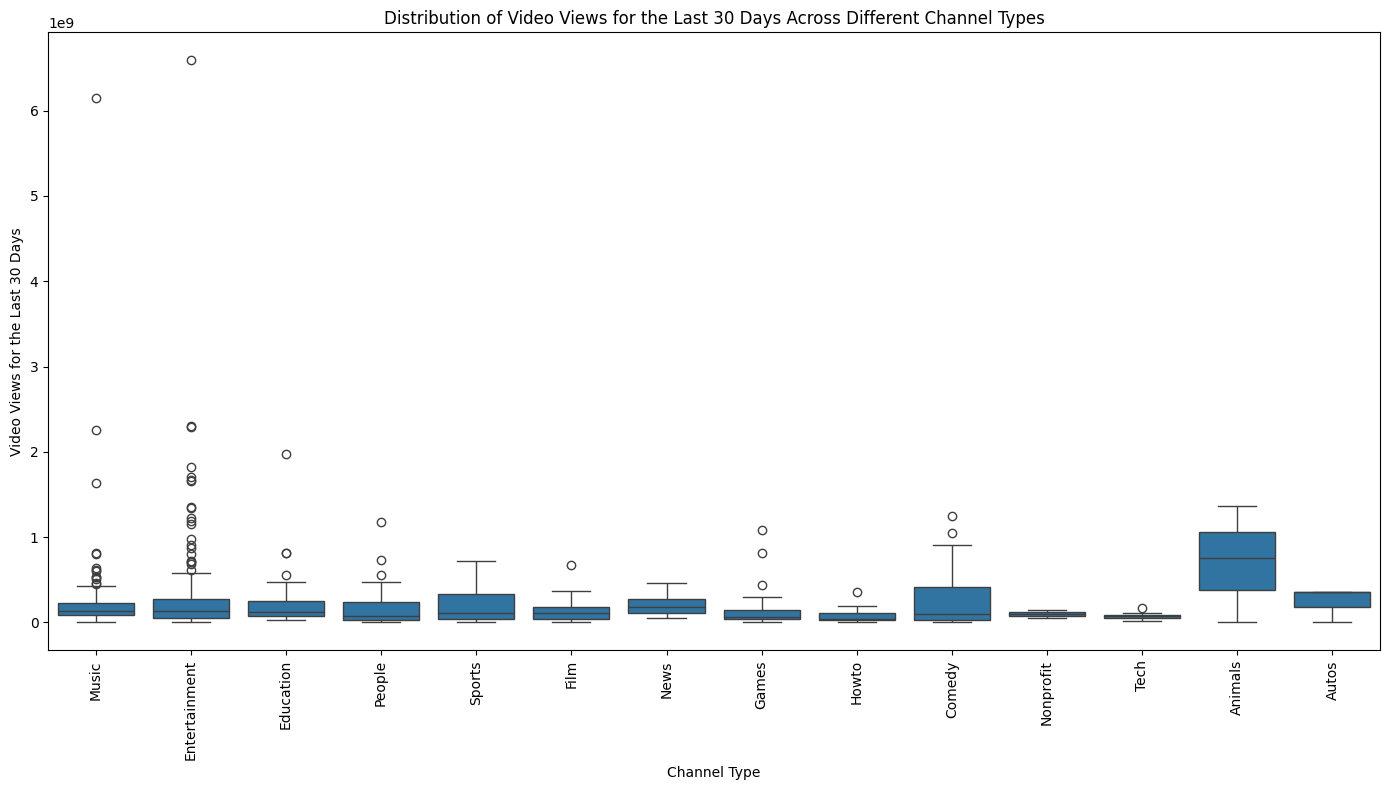

In [57]:
views_distribution_by_channel_type = data.groupby('channel_type')['video_views_for_the_last_30_days'].mean().sort_values(ascending=False)
print(views_distribution_by_channel_type)
plt.figure(figsize=(14, 8))
sns.boxplot(data=data, x='channel_type', y='video_views_for_the_last_30_days')
plt.xticks(rotation=90)
plt.title('Distribution of Video Views for the Last 30 Days Across Different Channel Types')
plt.xlabel('Channel Type')
plt.ylabel('Video Views for the Last 30 Days')
plt.tight_layout()
plt.show()

#19. Are there any seasonal trends in the number of videos uploaded by YouTube channels?


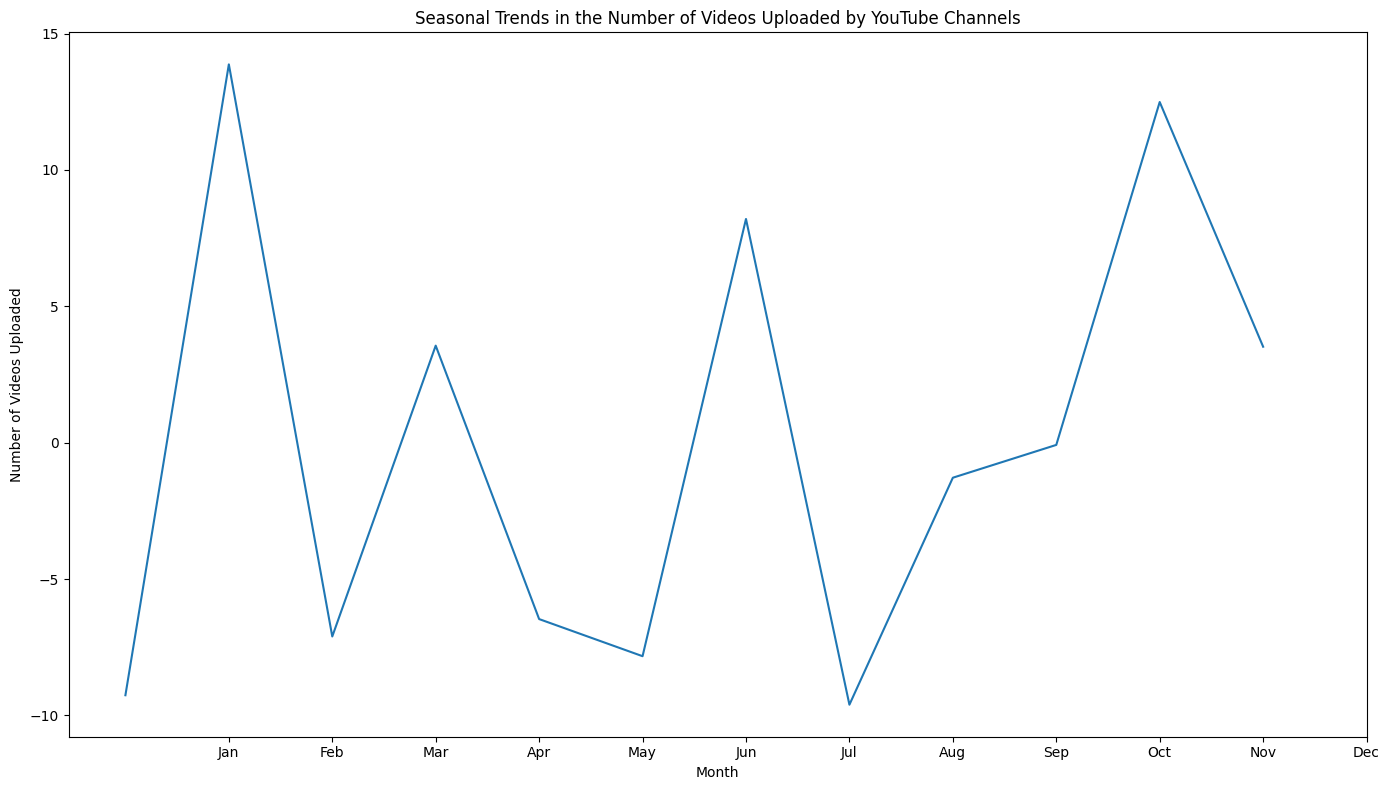

In [58]:
# Group by the month and sum the number of uploads
monthly_uploads = data.groupby('created_month')['uploads'].sum()

# Plot the seasonal trends in the number of videos uploaded
plt.figure(figsize=(14, 8))
sns.lineplot(x=monthly_uploads.index, y=monthly_uploads.values)
plt.title('Seasonal Trends in the Number of Videos Uploaded by YouTube Channels')
plt.xlabel('Month')
plt.ylabel('Number of Videos Uploaded')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

#20. What is the average number of subscribers gained per month since the creation of YouTube channels till now?


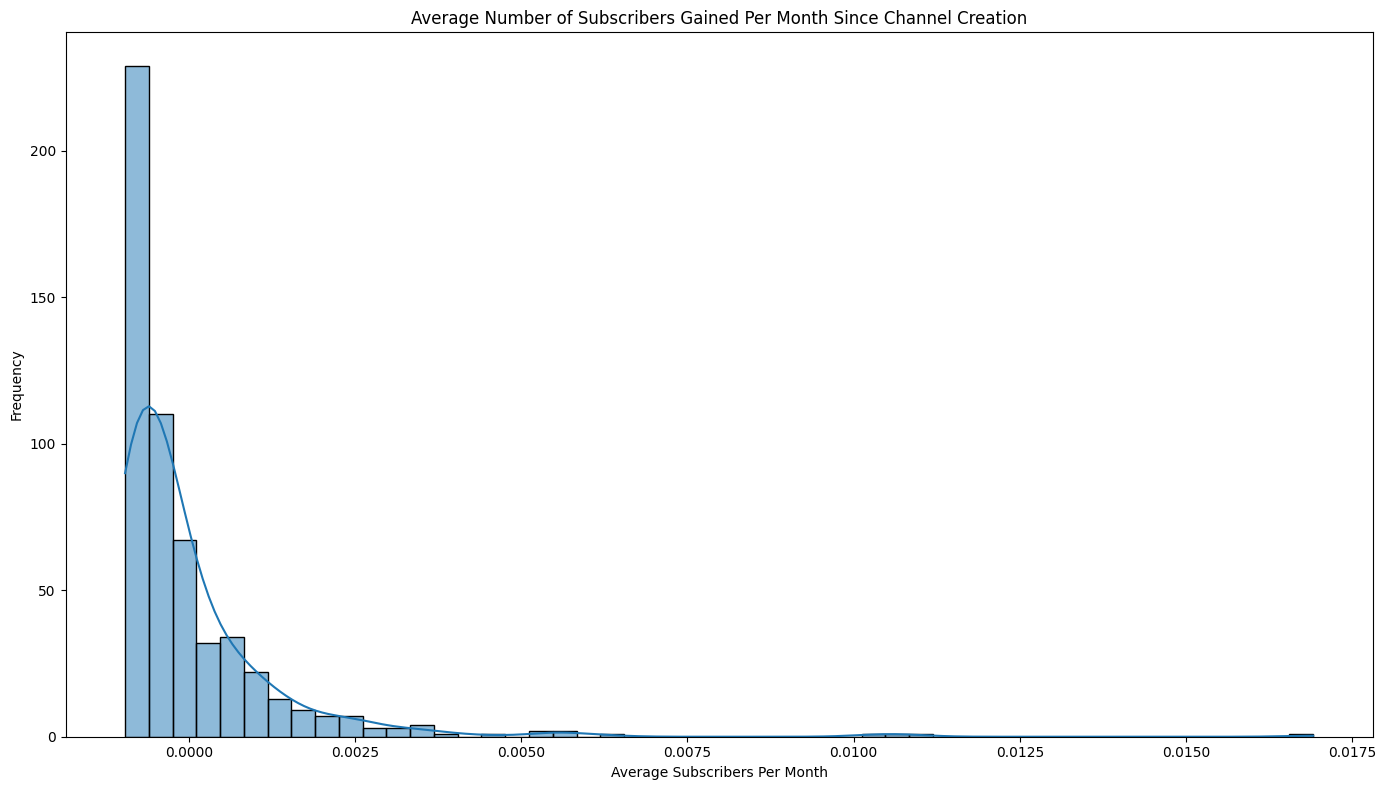

Top 10 YouTube Channels Based on Average Subscribers Gained Per Month Since Creation:
                       Youtuber  avg_subs_per_month
0                      T-Series            0.016909
2                       MrBeast            0.010844
3    Cocomelon - Nursery Rhymes            0.010536
4                     SET India            0.010306
8                   Like Nastya            0.006236
9                 Vlad and Niki            0.005691
10            Zee Music Company            0.005522
11                          WWE            0.005469
995                         WWE            0.005469
15                     Sony SAB            0.004470


In [60]:
# Plot the average number of subscribers gained per month
plt.figure(figsize=(14, 8))
sns.histplot(data['avg_subs_per_month'], bins=50, kde=True)
plt.title('Average Number of Subscribers Gained Per Month Since Channel Creation')
plt.xlabel('Average Subscribers Per Month')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Display top 10 channels based on average subscribers gained per month
print("Top 10 YouTube Channels Based on Average Subscribers Gained Per Month Since Creation:")
print(data[['Youtuber', 'avg_subs_per_month']].nlargest(10, 'avg_subs_per_month'))